# **Roboflow Dataset-Link** - 'https://universe.roboflow.com/yolox-qcftu/indian-number-plate-keeo5'

# **INSTALL DEPENDENCIES**

In [1]:
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.7 MB/s eta 0:00:00


# **Import Modules**

In [2]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from ultralytics import YOLO
from roboflow import Roboflow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# **Load The Dataset**

In [3]:
# DOWNLOAD DATASET FROM ROBOFLOW (METHOD 1)

from roboflow import Roboflow
rf = Roboflow(api_key="5tiVmFnSNXE8lmBhSdK1")
project = rf.workspace("yolox-qcftu").project("indian-number-plate-keeo5")
version = project.version(2)
dataset = version.download("yolov8")

print("✅ Dataset downloaded successfully!")
print("Dataset location:", dataset.location)


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Indian-number-plate-2 in yolov8:: 100%|██████████| 2716/2716 [00:00<00:00, 5213.05it/s]

✅ Dataset downloaded successfully!
Dataset location: /content/Indian-number-plate-2


In [4]:
# CHECK DATASET STRUCTURE

!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


# **Data Preprocessing**

In [6]:
# FIX data.yaml (IMPORTANT STEP)
# Roboflow gives ../train/images which fails in Colab

# FIXED_YAML_PATH = "/content/data.yaml"

#FIXED_YAML_PATH = "/content/Indian-number-plate-2/data_fixed.yaml"

FIXED_YAML_PATH = f"{dataset.location}/data_fixed.yaml"

yaml_text = f"""
train: {dataset.location}/train/images
val: {dataset.location}/valid/images
test: {dataset.location}/test/images

nc: 1
names: ['number_plate']
"""

with open(FIXED_YAML_PATH, "w") as f:
    f.write(yaml_text)

print("✅ Fixed YAML created at:", FIXED_YAML_PATH)


✅ Fixed YAML created at: /content/Indian-number-plate-2/data_fixed.yaml


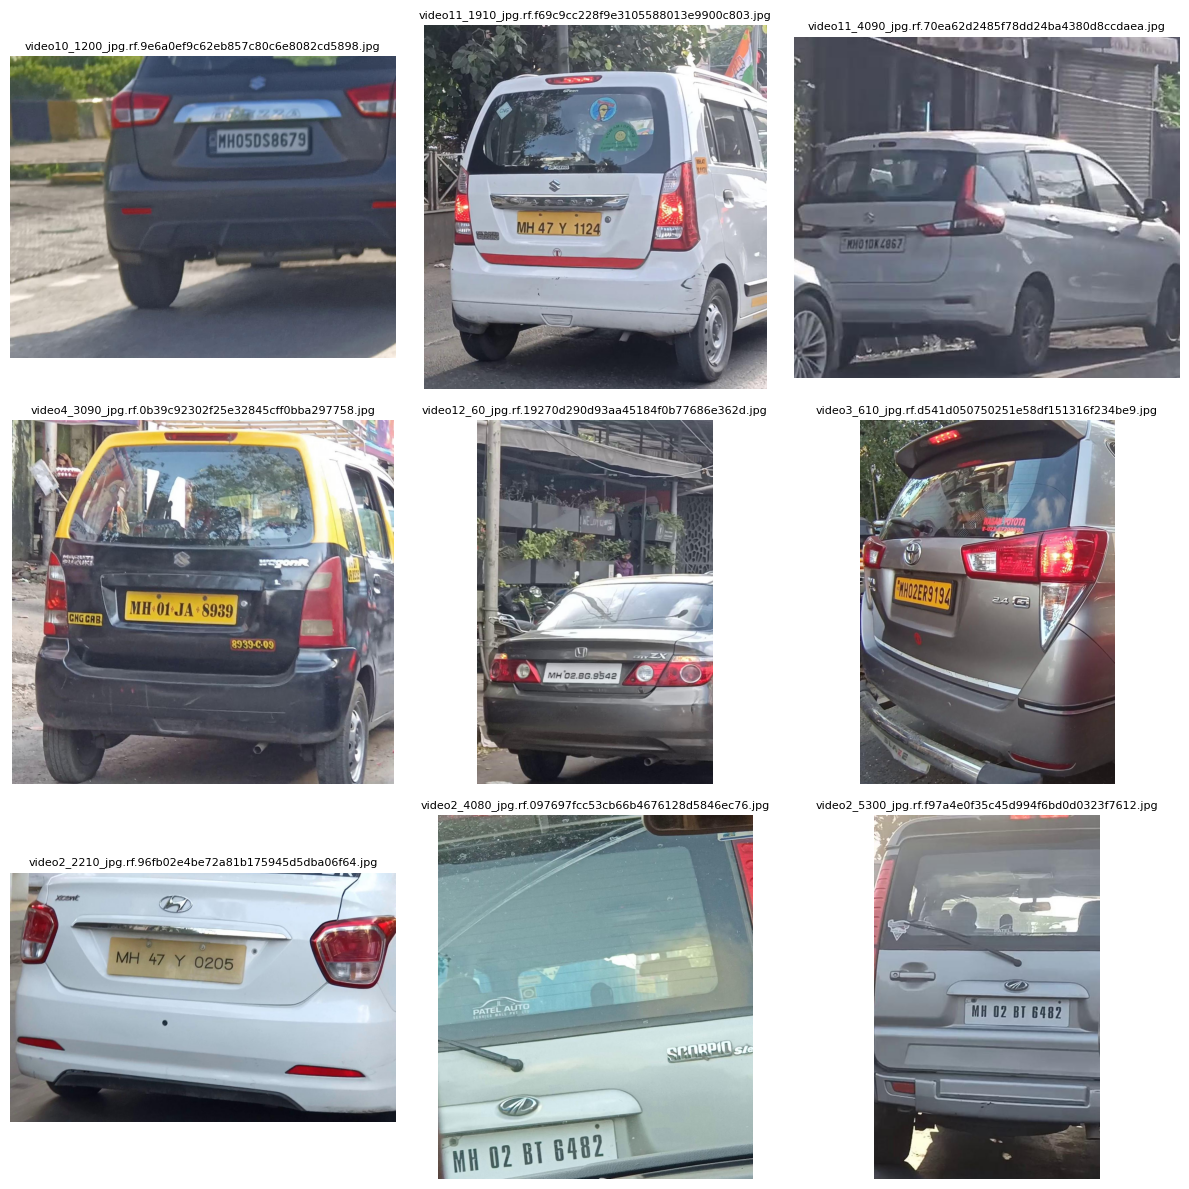

In [7]:
# VISUALIZE RANDOM TRAIN IMAGES (BEFORE TRAINING)

TRAIN_IMG_DIR = f"{dataset.location}/train/images"

train_images = os.listdir(TRAIN_IMG_DIR)
sample_imgs = random.sample(train_images, 9)

plt.figure(figsize=(12, 12))

for i, img_name in enumerate(sample_imgs):
    img_path = os.path.join(TRAIN_IMG_DIR, img_name)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(img_name, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()

# **Model Building**

In [8]:
# Load The Yolo Model

model = YOLO("yolov8n.pt")

In [10]:
# TRAIN YOLO MODEL

model.train(
    data=FIXED_YAML_PATH,
    epochs=10,
    imgsz=640,
    batch=16,
    name="train",
    exist_ok=True
)

Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Indian-number-plate-2/data_fixed.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=1

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d8e9fb6be60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [11]:
# Check the Results

results_csv = "/content/runs/detect/train/results.csv"
df = pd.read_csv(results_csv)

In [12]:
df.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,31.3335,1.05498,1.56010,0.99891,0.98638,0.92863,0.97899,0.68066,1.10087,1.31303,1.02005,0.000658,0.000658,0.000658
1,2,56.8026,1.12221,1.27587,1.05934,0.96078,0.94233,0.96844,0.62494,1.26223,0.98934,1.10425,0.001193,0.001193,0.001193
2,3,81.3005,1.12125,1.02237,1.06574,0.98711,0.98184,0.98531,0.66691,1.10094,0.91409,1.03525,0.001597,0.001597,0.001597
3,4,106.4150,1.06709,0.83886,1.04252,0.98360,1.00000,0.99437,0.67271,1.09384,0.63799,1.00540,0.001406,0.001406,0.001406
4,5,130.1560,1.05264,0.72246,1.03561,0.95922,0.98718,0.98641,0.70724,1.02049,0.56820,1.00316,0.001208,0.001208,0.001208


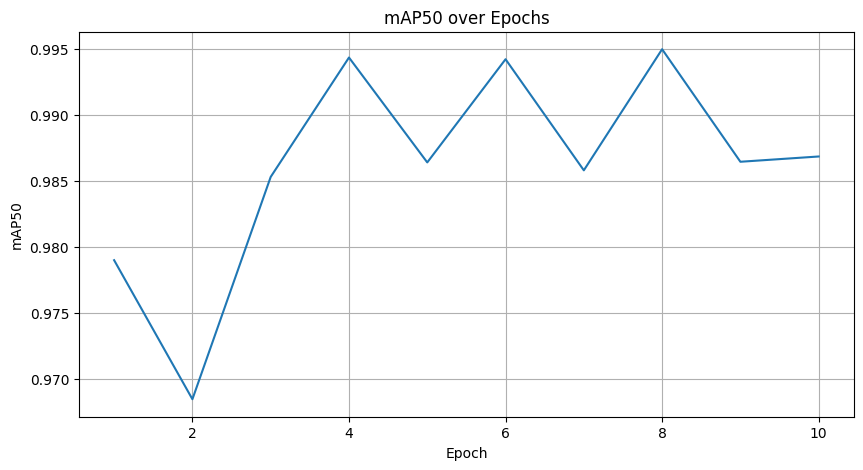

In [13]:
# PLOT TRAINING GRAPH (mAP50 over Epochs)

plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["metrics/mAP50(B)"])
plt.title("mAP50 over Epochs")
plt.xlabel("Epoch")
plt.ylabel("mAP50")
plt.grid(True)
plt.show()

# **Model Evaluation**

In [14]:
# LOAD BEST MODEL

BEST_MODEL_PATH = "/content/runs/detect/train/weights/best.pt"
best_model = YOLO(BEST_MODEL_PATH)

In [15]:
# EVALUATE ON TEST DATASET (BEFORE PREDICTION)

best_model.val(
    data=FIXED_YAML_PATH,
    split="test"
)

Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1664.8±805.7 MB/s, size: 125.5 KB)
val: Scanning /content/Indian-number-plate-2/test/labels... 59 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 59/59 2.3Kit/s 0.0s
val: New cache created: /content/Indian-number-plate-2/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 2.0it/s 2.0s
                   all         59         59      0.998          1      0.995      0.706
Speed: 6.0ms preprocess, 12.0ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /content/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d8e9fac19a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [16]:
# split = test means test folder?

# Yes ✅

# split="test" means YOLO will use the test folder defined in your data.yaml.

# Example data.yaml:

# train: train/images
# val: valid/images
# test: test/images


# So:

# Default (no split given)
# model.val(data="data.yaml")


# ➡️ uses val/images

# With split="test"
# model.val(data="data.yaml", split="test")


# ➡️ uses test/images

# So yes, split="test" = evaluate on test folder.

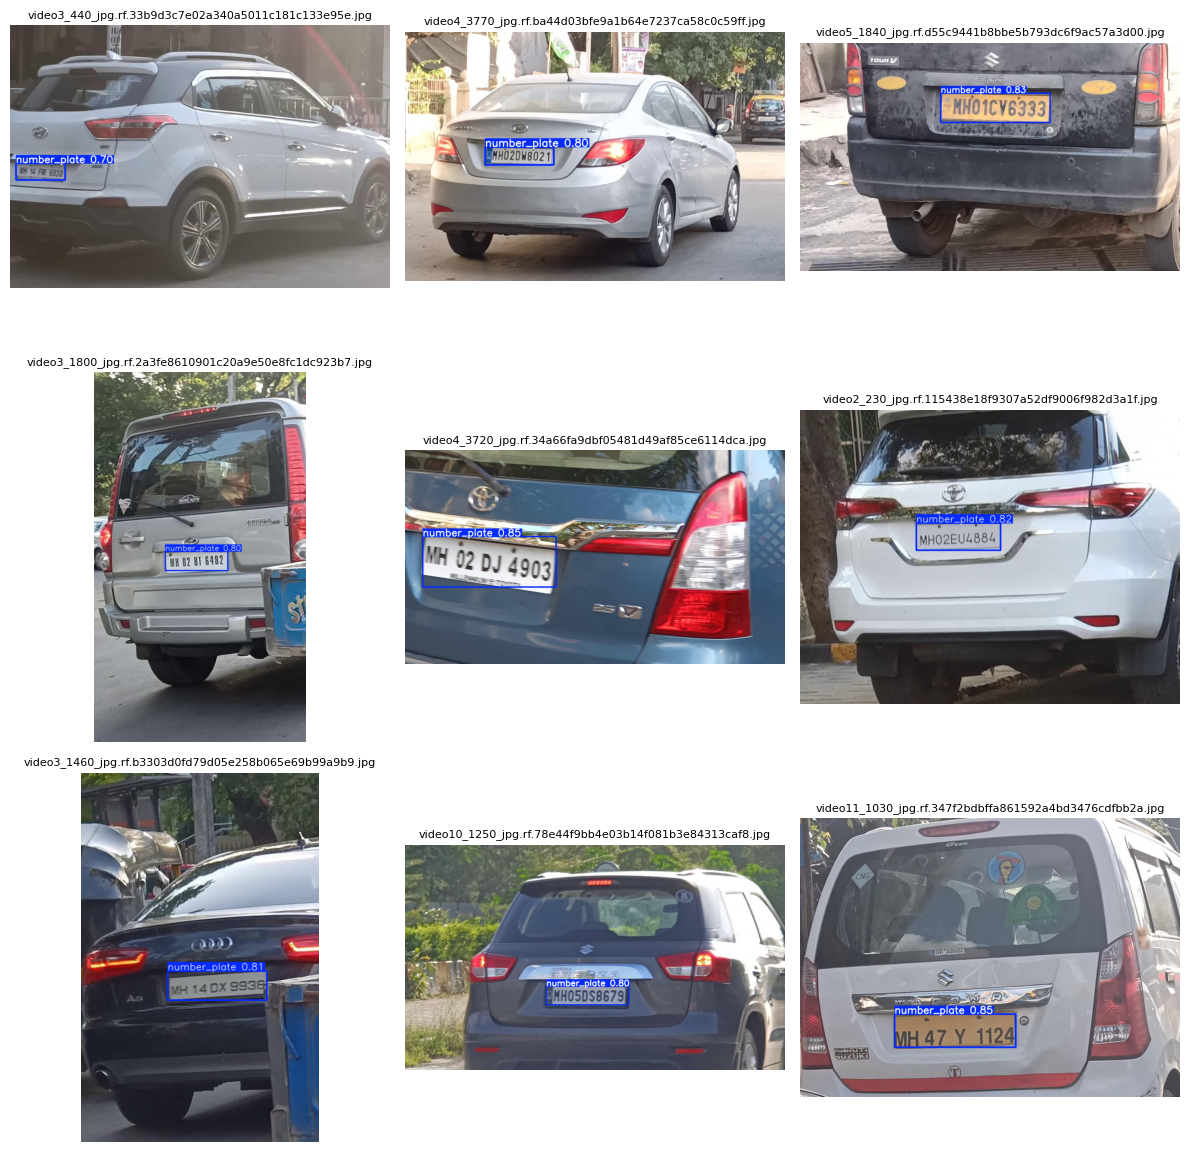

In [22]:
# VISUALIZE RANDOM TEST PREDICTIONS (AFTER TRAINING)

TEST_IMG_DIR = f"{dataset.location}/test/images"

test_images = os.listdir(TEST_IMG_DIR)
sample_test_imgs = random.sample(test_images, 9)

plt.figure(figsize=(12, 12))

for i, img_name in enumerate(sample_test_imgs):
    img_path = os.path.join(TEST_IMG_DIR, img_name)

    results = best_model.predict(img_path, conf=0.4, verbose=False)[0]

    annotated_img = results.plot()
    #annotated_img = results.plot(conf=True, labels=False)  # remove "number_plate" text

    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i+1)
    plt.imshow(annotated_img)
    plt.title(img_name, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [23]:
# DOWNLOAD BEST MODEL (best.pt)

from google.colab import files
files.download(BEST_MODEL_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>